In [170]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.inspection import permutation_importance

In [171]:
#load dataset into dataframe raw_df
raw_df = pd.read_csv('stats.csv')
#raw_df.head(n=-5)

In [172]:
print(f'The raw dataset consists of {len(raw_df)} observations on {(len(raw_df.columns))} features.\n')
print(f'Those features are: \n')
    
for column in raw_df.columns:
    print(column)

print(f'\n Feature of interest: on_base_plus_slg')

The raw dataset consists of 538 observations on 23 features.

Those features are: 

last_name, first_name
player_id
year
pa
hit
single
double
triple
home_run
k_percent
bb_percent
on_base_plus_slg
exit_velocity_avg
sweet_spot_percent
barrel_batted_rate
solidcontact_percent
hard_hit_percent
avg_best_speed
avg_hyper_speed
whiff_percent
swing_percent
groundballs_percent
flyballs_percent

 Feature of interest: on_base_plus_slg


In [ ]:
####PREFORM EDA ON RAW_DF

In [ ]:
# #Getting a general idea of how highly correlated features are to see if we need to consider feature engineering or a different means to deal with them
# correlation_matrix = df.corr()

# # Define threshold
# threshold = 0.7  # Adjust the threshold as needed

# # Filter correlation matrix to find highly correlated pairs
# highly_correlated_pairs = []
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i+1, len(correlation_matrix.columns)):
#         if abs(correlation_matrix.iloc[i, j]) > threshold:
#             highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# # Display highly correlated pairs
# print("Pairs of variables with correlation greater than", threshold, ":")
# for pair in highly_correlated_pairs:
#     print(pair)

In [173]:
#new dataframe for cleaning and pre-processing 
df = raw_df.copy()
#df.head(n=5)

In [174]:
print(f'\n Checking for missing (Na) values: \n ')
print(f'{df.isna().sum()}')
print(f'\n Checking for duplicated values: \n ')
print(f'{df.duplicated().sum()}')


 Checking for missing (Na) values: 
 
last_name, first_name    0
player_id                0
year                     0
pa                       0
hit                      0
single                   0
double                   0
triple                   0
home_run                 0
k_percent                0
bb_percent               0
on_base_plus_slg         0
exit_velocity_avg        0
sweet_spot_percent       0
barrel_batted_rate       0
solidcontact_percent     0
hard_hit_percent         0
avg_best_speed           0
avg_hyper_speed          0
whiff_percent            0
swing_percent            0
groundballs_percent      0
flyballs_percent         0
dtype: int64

 Checking for duplicated values: 
 
0


In [175]:
#Dropping the name column --> not numeric or of interes
#Dropping the player_id column--> not numeric or of interest 
df.drop('last_name, first_name',axis = 1,inplace=True)
df.drop('player_id',axis = 1,inplace=True)
#df.head(n=1)

In [176]:
print(f'Now there are {len(df)} observations on {(len(df.columns))} features.\n')
print(f'Those features are: \n')
    
for column in raw_df.columns:
    print(column)

print(f'\n Feature of interest: on_base_plus_slg')

Now there are 538 observations on 21 features.

Those features are: 

last_name, first_name
player_id
year
pa
hit
single
double
triple
home_run
k_percent
bb_percent
on_base_plus_slg
exit_velocity_avg
sweet_spot_percent
barrel_batted_rate
solidcontact_percent
hard_hit_percent
avg_best_speed
avg_hyper_speed
whiff_percent
swing_percent
groundballs_percent
flyballs_percent

 Feature of interest: on_base_plus_slg


In [177]:
#Splitting dataframe df into 3 different datasets: train_df, val_df, test_df
#There were 4 years (2020,2021,2022,2023) contained in the dataset df so a natural train,val,test split is on the years 


train_df = df[(df['year'] == 2021) | (df['year'] == 2020)]
val_df = df[df.year==2022]
test_df = df[df.year==2023]

In [178]:
n_2020= len(df[df['year']==2020]) 
n_2021= len(df[df['year']==2021])
n_2022= len(df[df['year']==2022])
n_2023= len(df[df['year']==2023])

print(f'In the original dataset there are {len(df)} observations.')
print(f'\n There are {n_2020 + n_2021} observations in the train dataset which consists of data from the years 2020 and 2021.')
print(f'\n There are {n_2022} observations in the val dataset which consists of data from the year 2022.')
print(f'\n There are {n_2023} observations in the test dataset which consists of data from the year 2023.')



In the original dataset there are 538 observations.

 There are 274 observations in the train dataset which consists of data from the years 2020 and 2021.

 There are 130 observations in the val dataset which consists of data from the year 2022.

 There are 134 observations in the test dataset which consists of data from the year 2023.


In [ ]:
###LINEAR REGRESSION MODEL PRE-LIM

In [179]:
features = ['pa', 'hit', 'single', 'double', 'triple','home_run', 'k_percent', 'bb_percent',
      'exit_velocity_avg',
      'sweet_spot_percent', 'barrel_batted_rate',
      'solidcontact_percent', 'hard_hit_percent', 
      'avg_best_speed','avg_hyper_speed',
      'whiff_percent', 'swing_percent',
      'groundballs_percent', 'flyballs_percent']
X_train = train_df[features]
y_train = train_df['on_base_plus_slg']

In [180]:
###LINEAR REGRESSION TRAINNING
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
b = model.intercept_
w = model.coef_[0]
print(f'TRAINING:::intercept={b:.3}, slope={w:.3}')
print(f'Accuracy on Training Data R^2= {model.score(X_train,y_train):.3}')


TRAINING:::intercept=1.78, slope=-0.00124
Accuracy on Training Data R^2= 0.857


In [181]:
####VALIDATION
X_val = val_df[features]
y_val = val_df['on_base_plus_slg']

In [182]:
validation_predictions = model.predict(X_val)
MAE_val = mean_absolute_error(y_val,validation_predictions)
MSE_val = mean_squared_error(y_val,validation_predictions)
RMSE_val = np.sqrt(MSE_val)

print("MAE_val: %f" % (MAE_val))
print("RMSE_val: %f" % (RMSE_val))

MAE_val: 0.024114
RMSE_val: 0.029595


In [ ]:
model.coef_

In [ ]:
####PERMUTATION FEATURE IMPORTANCE ON LINEAR REGRESSION MODEL
# THERE ARE MANY FEATURES AND ALL OF THEM HAVE VERY SMALL WEIGHTS (COEF VALUES) SO I AM GOING TO PERFORM PERMUTATION IMPORTANCE
# PERMUTATION IMPORTANCE::::evalutates the contributions of each feature to a fitted model 

pi.importances_mean=[1.13555218e+00 4.20713553e+00 3.62192471e-01 9.39212964e-08
 8.03251934e-03 4.83851829e-01 1.21028182e-02 3.71597897e-01
 5.98446112e-02 1.05037450e-03 3.77125228e-04 3.63301434e-04
 2.62495449e-03 8.34737569e-02 1.64274154e-01 8.11241313e-03
 7.24506597e-03 6.27026426e-03 1.08881707e-03]
pi.importances_std=[8.73269548e-02 3.30416756e-01 1.97919587e-02 1.82250255e-04
 1.28926661e-03 2.20262318e-02 3.25005248e-03 2.36976543e-02
 4.97689497e-03 6.44952234e-04 5.69575140e-04 4.30270443e-04
 1.62854058e-03 3.22406053e-03 2.18971651e-02 2.94661367e-03
 1.13280472e-03 1.10816074e-03 8.53510935e-04]
pi.importances=[[ 1.14268294e+00  1.02710328e+00  1.17932914e+00  1.27096717e+00
   1.05767836e+00]
 [ 3.97400159e+00  3.84520032e+00  4.25572820e+00  4.80352088e+00
   4.15722666e+00]
 [ 3.41726857e-01  3.60733703e-01  3.98917248e-01  3.48491333e-01
   3.61093212e-01]
 [-2.21298791e-05  2.41097466e-04 -1.56667058e-04  1.70333146e-04
  -2.32164068e-04]
 [ 7.36475255e-03  6.637

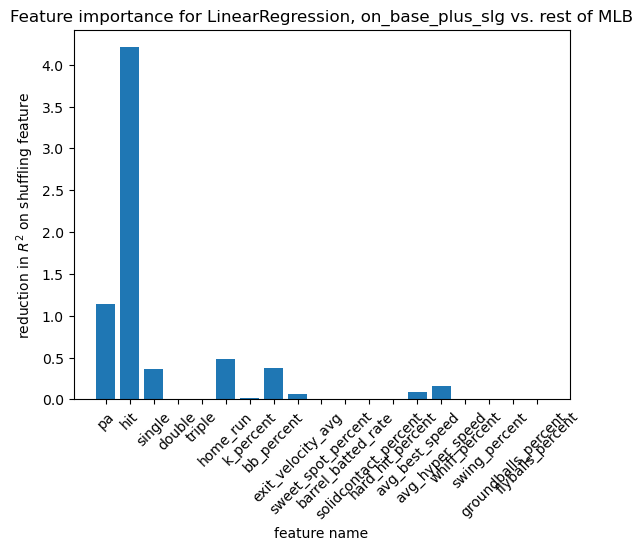

In [183]:

X_feat_importance = val_df[features]
y_feat_importance = val_df['on_base_plus_slg']
model = linear_model.LinearRegression()
model.fit(X_feat_importance, y_feat_importance)
pi = permutation_importance(estimator=model, X=X_feat_importance, y=y_feat_importance, random_state=0)
print(f'pi.importances_mean={pi.importances_mean}')
print(f'pi.importances_std={pi.importances_std}')
print(f'pi.importances={pi.importances}')
plt.bar(x=range(X_feat_importance.columns.size), height=pi.importances_mean, tick_label=X_feat_importance.columns)
plt.title('Feature importance for LinearRegression, on_base_plus_slg vs. rest of MLB')
plt.xlabel('feature name')
plt.xticks(rotation=45)
_ = plt.ylabel(r'reduction in $R^2$ on shuffling feature')

In [184]:
###ONLY CONSIDERING PA , HITS, k_percent 

X_train = train_df[['pa','hit','home_run','bb_percent']]
y_train = train_df['on_base_plus_slg']
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.7736870947931506

In [185]:
X_val = val_df[['pa','hit','home_run','bb_percent']]
y_val = val_df['on_base_plus_slg']
validation_predictions = model.predict(X_val)
MAE_val = mean_absolute_error(y_val,validation_predictions)
MSE_val = mean_squared_error(y_val,validation_predictions)
RMSE_val = np.sqrt(MSE_val)

print("MAE_val: %f" % (MAE_val))
print("RMSE_val: %f" % (RMSE_val))

MAE_val: 0.025832
RMSE_val: 0.032745


In [186]:
X_train = train_df[['pa','hit','k_percent','home_run']]
y_train = train_df['on_base_plus_slg']
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.5852369353638134

In [187]:
X_val = val_df[['pa','hit','k_percent','home_run']]
y_val = val_df['on_base_plus_slg']
validation_predictions = model.predict(X_val)
MAE_val = mean_absolute_error(y_val,validation_predictions)
MSE_val = mean_squared_error(y_val,validation_predictions)
RMSE_val = np.sqrt(MSE_val)

print("MAE_val: %f" % (MAE_val))
print("RMSE_val: %f" % (RMSE_val))

MAE_val: 0.034610
RMSE_val: 0.041996


In [189]:
X_train = train_df[['single','double','triple','home_run','bb_percent','k_percent']]
y_train = train_df['on_base_plus_slg']
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.3868700964842231

In [50]:
X_val = val_df[['single','double','triple','home_run','bb_percent','k_percent']]
y_val = val_df['on_base_plus_slg']
validation_predictions = model.predict(X_val)
MAE_val = mean_absolute_error(y_val,validation_predictions)
MSE_val = mean_squared_error(y_val,validation_predictions)
RMSE_val = np.sqrt(MSE_val)

print("MAE_val: %f" % (MAE_val))
print("RMSE_val: %f" % (RMSE_val))

MAE_val: 0.059036
RMSE_val: 0.071730


In [191]:
###TEST LINEAR REGRESSION
X_test = test_df[features]
y_test = test_df['on_base_plus_slg']

#y_hat = model.predict()


In [192]:

####Fun test to see how correctly we can predict a single players obps 
####Chosen player is Kwan, Steven




row_data = raw_df.iloc[529].to_frame().T
fun = pd.DataFrame(row_data)

features = ['single','double','triple','home_run','bb_percent','k_percent','on_base_plus_slg']
fun = fun[features]
fun_numeric = fun.apply(pd.to_numeric)



xfeatures = ['single','double','triple','home_run','bb_percent','k_percent']



X_fun = fun_numeric[xfeatures]



prediction = model.predict(X_fun)
predicted_obps = prediction[0] 


actual_obps = fun_numeric['on_base_plus_slg'].iloc[0]

print(f'The predicted obps is {predicted_obps:.3} and the actual obps is {actual_obps}.')

The predicted obps is 0.74 and the actual obps is 0.71.


In [ ]:
###CREATE PLOTS 

CREATING A CLASSIFICATION PROBLEM 
BINNING OBPS 
An OPS scale

According to https://en.wikipedia.org/wiki/On-base_plus_slugging
"Bill James, in his essay titled "The 96 Families of Hitters"[4] uses seven different categories for classification by OPS:

| Category | Classification	| OPS range       |
|----------|----------------|-----------------|
|A         |	Great	    |.9000 and higher |
|B         |	Very good	|.8334 to .8999   |
|C         |Above average   |.7667 to .8333   |
|D         |	Average	    | .7000 to .7666  |
|E         |Below average	|.6334 to .6999   |
|F         |	Poor	    |.5667 to .6333   |
|G         |	Very poor   |.5666 and lower  |




I have created a scale such that we are classifying below, average and above average hitters based on their ops
The categories for classification by OPS I have created: 


| Category | Classification	| OPS range       |
|----------|----------------|-----------------|
|   1      |Above average   |.7667 and higher |
|0         |	Average	    | .7000 to .7666  |
|-1        |Below average	|.6999  and lower |


In [222]:
#new dataset for classification
c_df = df.copy()

# Define the OPS ranges and corresponding classifications
ops_ranges = {
    1: (0.7667, float('inf')),
    0: (0.7000, 0.7666),
    -1: (-float('inf'), 0.6999)
}

# Create an empty list to store the classifications
classifications = []

# Iterate over each OPS value in your dataset
for ops_value in c_df['on_base_plus_slg']:
    # Iterate over each classification and its corresponding OPS range
    for classification, (lower_bound, upper_bound) in ops_ranges.items():
        # Check if the OPS value falls within the current classification's range
        if lower_bound <= ops_value < upper_bound:
            # If it does, append the classification to the list
            classifications.append(classification)
            # Break out of the inner loop since we found the correct classification
            break
    else:
        # If the OPS value didn't fall within any range, append a default value
        classifications.append('Unknown')

# Add the classifications to your dataset as a new column
c_df['Classification'] = classifications



#double checking that there are no missing or duplicated values for saftey 

if c_df.isna().any().any():
    print("There are missing values in the classification dataframe c_df.")
else:
    print("There are no missing values in the classification dataframe c_df")

if c_df.duplicated().any().any():
    print("There are duplicated values in the classification dataframe c_df.")
else:
    print("There are no duplicated values in the classification dataframe c_df")


There are no missing values in the classification dataframe c_df
There are no duplicated values in the classification dataframe c_df


In [224]:
#creating new train,val,test datasets based on the same methodology as above 
c_train_df = c_df[(c_df['year'] == 2021) | (c_df['year'] == 2020)]
c_val_df = c_df[c_df.year==2022]
c_test_df = c_df[c_df.year==2023]